In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.datasets import load_boston

In [159]:
sns.set_theme(style="whitegrid", palette="deep")

In [189]:
# load dataset boston , sklearn
data_boston = load_boston()

In [161]:
# caracteristicas del dataset
data_boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [162]:
# select features
boston = pd.DataFrame(data_boston.data,columns = data_boston.feature_names)[['RM','LSTAT','CRIM']]

In [163]:
boston.head()

,RM,LSTAT,CRIM
0,6.575,4.98,0.00632
1,6.421,9.14,0.02731
2,7.185,4.03,0.02729
3,6.998,2.94,0.03237
4,7.147,5.33,0.06905


In [164]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RM      506 non-null    float64
 1   LSTAT   506 non-null    float64
 2   CRIM    506 non-null    float64
dtypes: float64(3)
memory usage: 12.0 KB


In [165]:
boston.describe().round(3)

,RM,LSTAT,CRIM
count,506.000,506.000,506.000
mean,6.285,12.653,3.614
std,0.703,7.141,8.602
min,3.561,1.730,0.006
25%,5.885,6.950,0.082
50%,6.208,11.360,0.257
75%,6.624,16.955,3.677
max,8.780,37.970,88.976


# **Graphics**

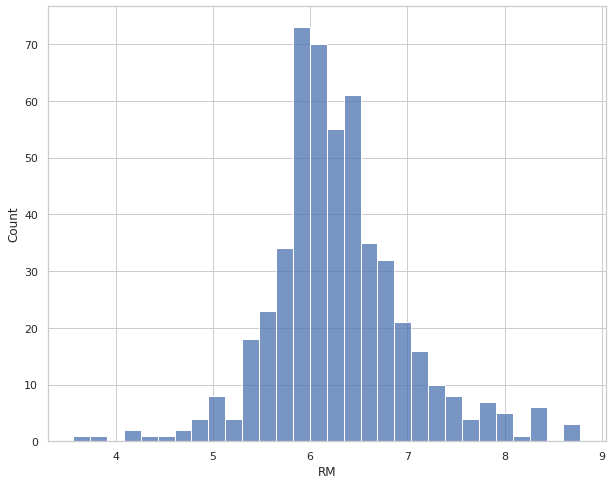

In [166]:
plt.figure(figsize=(10,8))
sns.histplot(boston['RM'],bins=30);

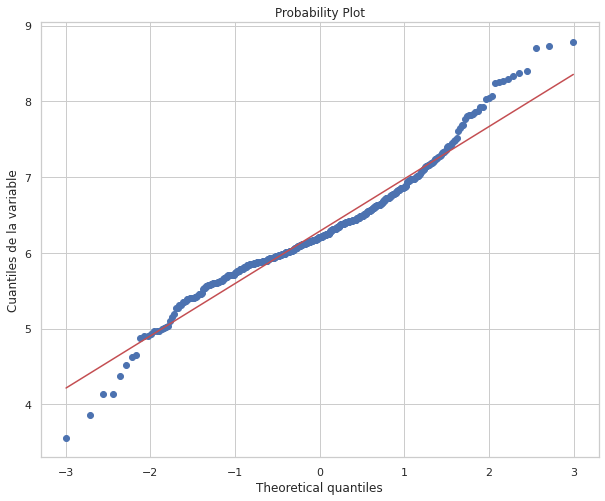

In [167]:
plt.figure(figsize=(10,8))
stats.probplot(boston['RM'],dist="norm",plot=plt)
plt.ylabel('Cuantiles de la variable');

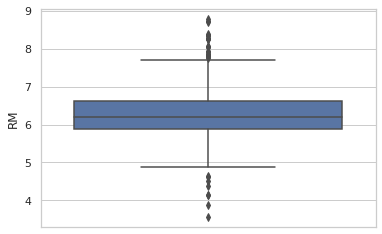

In [168]:
sns.boxplot(y=boston['RM']);

# **Function to generate graphs**

In [169]:
def graficos(df,variable):
   
  plt.figure(figsize=(25,4))
  plt.suptitle(f'Grafico Análsis outliers para la varaible : {variable}')
      
  plt.subplot(1,3,1)
  sns.histplot(df[variable],bins=30)
  plt.title('Histograma')
  
  plt.subplot(1,3,2)
  stats.probplot(df[variable],dist="norm",plot=plt)
  plt.ylabel('Cuantiles variable')

  plt.subplot(1,3,3)
  sns.boxplot(y=df[variable])
  plt.title("Grafico de Caja y Bigotes")

  plt.show()



In [170]:
# columns list
boston.columns

Index(['RM', 'LSTAT', 'CRIM'], dtype='object')

In [171]:
variables = ['RM', 'LSTAT', 'CRIM']

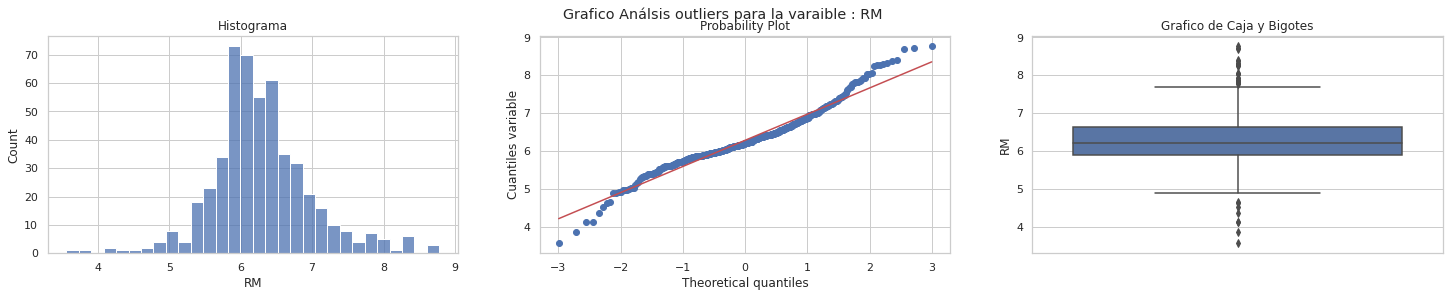

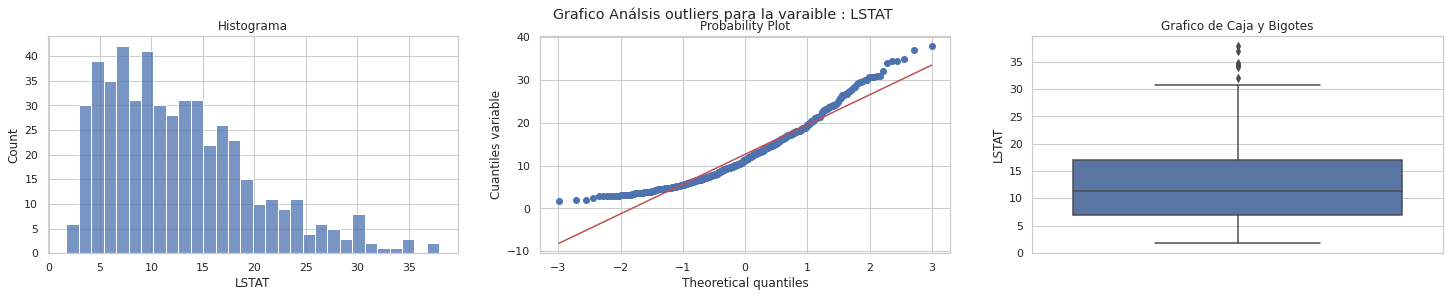

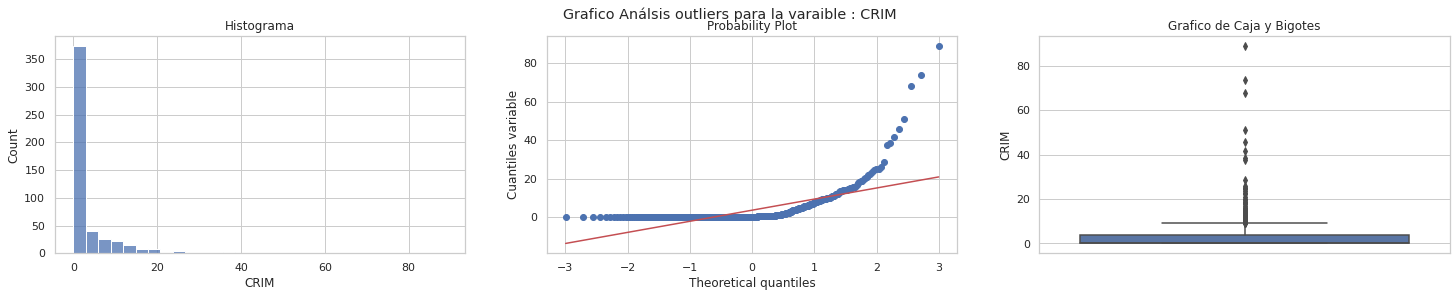

In [172]:
# loops 
for variable in variables:
  graficos(boston,variable)
  

In [173]:
#IQR interquartile range 
IQR = boston['RM'].quantile(0.75)-boston['RM'].quantile(0.25)

In [174]:
print(f"{IQR=:.2f}")

IQR=0.74


In [175]:
distancia = 1.5
limite_superior = boston['RM'].quantile(0.75)+(IQR*distancia)
print(f"{limite_superior=:.2f}")

limite_superior=7.73


In [176]:
distancia = 1.5
limite_inferior = boston['RM'].quantile(0.25)-(IQR*distancia)
print(f"{limite_inferior=:.2f}")

limite_inferior=4.78


In [177]:
def limites_outliers(df,variable,distancia):
  IQR = df[variable].quantile(0.75)-df[variable].quantile(0.25)
  limite_inferior = df[variable].quantile(0.25)-(IQR*distancia)
  limite_superior = df[variable].quantile(0.75)+(IQR*distancia)
  return limite_superior , limite_inferior

In [178]:
RM_limite_superior , RM_limite_inferior = limites_outliers(boston,'RM',1.5)
RM_limite_superior , RM_limite_inferior

(7.730500000000001, 4.778499999999999)

In [179]:
LSTAT_limite_superior , LSTAT_limite_inferior = limites_outliers(boston,'LSTAT',1.5)
LSTAT_limite_superior , LSTAT_limite_inferior

(31.962500000000006, -8.057500000000005)

In [180]:
CRIM_limite_superior , CRIM_limite_inferior = limites_outliers(boston,'CRIM',1.5)
CRIM_limite_superior , CRIM_limite_inferior

(9.06963875, -5.31051125)

In [181]:
outliers_RM = np.where(boston['RM'] > RM_limite_superior, True,
                       np.where(boston['RM'] < RM_limite_inferior, True, False))

In [182]:
outliers_LSTAT = np.where(boston['LSTAT'] > LSTAT_limite_superior, True,
                       np.where(boston['LSTAT'] < LSTAT_limite_inferior, True, False))

In [183]:
outliers_CRIM = np.where(boston['CRIM'] > CRIM_limite_superior, True,
                       np.where(boston['CRIM'] < CRIM_limite_inferior, True, False))

In [184]:
valor= outliers_RM + outliers_LSTAT + outliers_CRIM

In [185]:
# Eliminemos los outliers del set de datos

boston_recortado = boston.loc[~(outliers_RM + outliers_LSTAT + outliers_CRIM), ]

boston.shape, boston_recortado.shape

((506, 3), (416, 3))

In [186]:
boston_recortado.describe().round(2)

,RM,LSTAT,CRIM
count,416.00,416.00,416.00
mean,6.26,11.53,1.22
std,0.52,5.83,2.17
min,4.90,1.73,0.01
25%,5.91,6.89,0.07
50%,6.19,10.41,0.17
75%,6.57,14.99,0.96
max,7.69,30.81,8.98


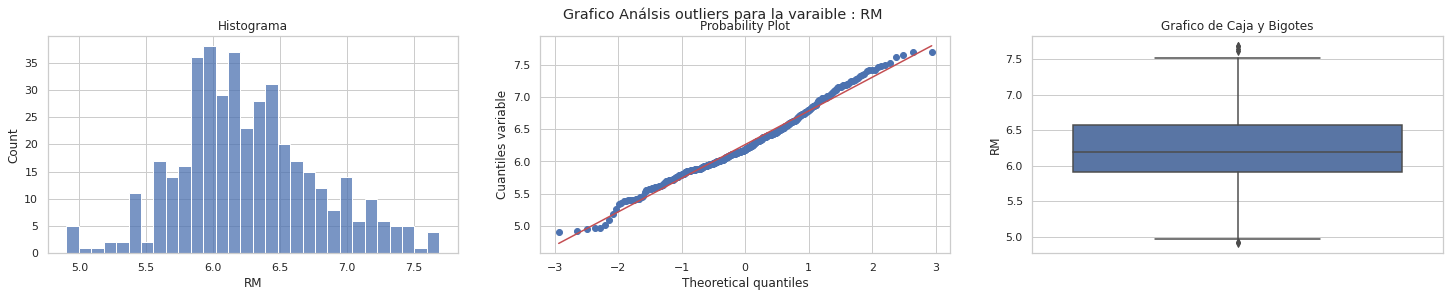

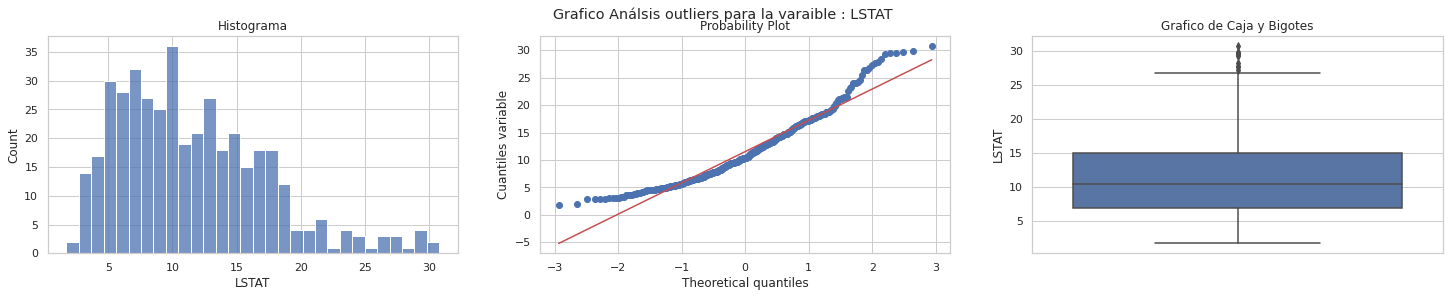

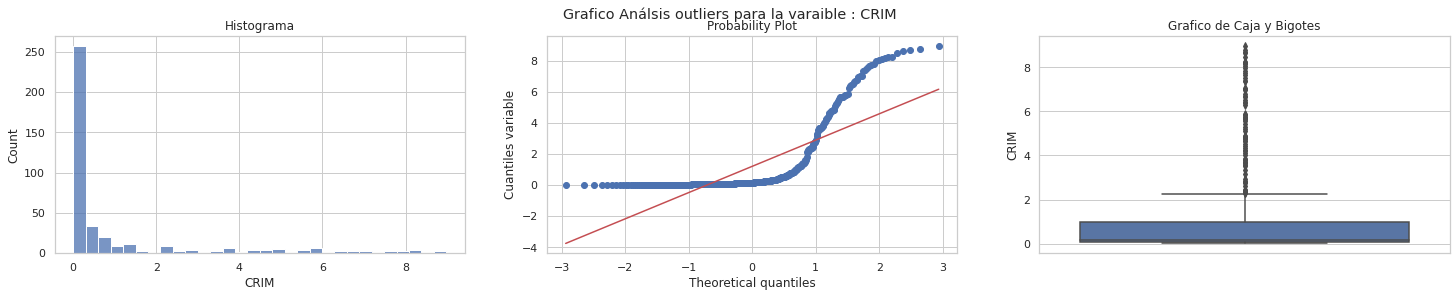

In [187]:
for variable in variables:
  graficos(boston_recortado,variable)